In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# =============part c: Plot data and the optimal linear fit=================
# NOTE: to finish this part, you need to finish the part(a) of this part
# 		first

# load the four data points of tihs problem
X = np.array([0, 2, 3, 4])
y = np.array([1, 3, 6, 8])


# TODO: replace the m_opt and b_opt with the solution you obtained from
# 		part (a), note that y = mx + b
#"*** YOUR CODE HERE ***"
m_opt = 62/35
b_opt = 18/35
#"*** END YOUR CODE HERE ***"

In [3]:
# TODO: generate 100 points along the line of optimal linear fit.

# HINT:
#	1) Use np.linspace to get the x-coordinate of 100 points
#	2) Calculate the y-coordinate of those 100 points with the m_opt and
#	   b_opt, remember y = mx+b.
#	3) Use a.reshape(-1,1), where a is a np.array, to reshape the array
#	   to appropraite shape for generating plot

X_space = []
y_space = []
"*** YOUR CODE HERE ***"
X_space = np.linspace(-1, 5, num=100)
print("Shape of X_space before reshape: ", X_space.shape)
X_space = X_space.reshape(-1, 1) # The -1 i tells NumPy to automatically calculate the size of this dimension. 
                                    # The 1 indicates that the second dimension of the new shape should have a single column.
print("Shape of X_space after reshape: ",X_space.shape)
y_space = (m_opt * X_space + b_opt).reshape(-1, 1)
"*** END YOUR CODE HERE ***"

# plot the optimal learn fit you obtained and save it to your current
# folder
plt.style.use('ggplot')
plt.plot(X, y, 'ro')
plt.plot(X_space, y_space)
# plt.savefig('hw1pr2c.png', format='png')
plt.close()


Shape of X_space before reshape:  (100,)
Shape of X_space after reshape:  (100, 1)


In [4]:
# =============part d: Optimal linear fit with random data points=================

# variables to start with
mu, sigma, sampleSize = 0, 1, 100

# TODO: Generate white Gaussian noise
# HINT: Use np.random.normal to generate noise

noise = []
#"*** YOUR CODE HERE ***"
noise = np.random.normal(mu, sigma, sampleSize).reshape(-1, 1)
#"*** END YOUR CODE HERE ***"

In [5]:
# TODO: generate y-coordinate of the 100 points with noise

# HINT:
#	1) Use X_space created in the part (c) above as the x-coordinates
#	2) In this case, y = mx + b + noise

y_space_rand = np.zeros(len(X_space))
#"*** YOUR CODE HERE ***"
y_space_rand = m_opt * X_space + b_opt + noise
#"*** END YOUR CODE HERE ***"


In [6]:
# TODO: calculate the new parameters for optimal linear fit using the
#		100 new points generated above

# HINT:
#	1) Use np.ones_like to create a column of 1
#	2) Use np.hstack to stack column of ones on X_space to create
#	   X_space_stacked
#	3) Use np.linalg.solve to solve W_opt following the normal equation:
#	   X.T * X * W_opt = X.T * y


X_space_stacked = X_space	# need to be replaced following hint 1 and 2
W_opt = None
# "*** YOUR CODE HERE ***"
ones = np.ones_like(y_space) # Creates an array of 1's that have the same shaoe as y_space
print(ones.shape, y_space.shape)
X_space_stacked = np.hstack((ones, X_space))
print(ones.shape, X_space.shape, X_space_stacked.shape)
print(X_space_stacked[:5])
print(X_space[:5])

#np.linalg.solve(a,b) solves the equation ax = b.
W_opt = np.linalg.solve(X_space_stacked.T @ X_space_stacked,
    X_space_stacked.T @ y_space_rand) # @ represents matrix multiplication

# "*** END YOUR CODE HERE ***"

# get the new m, and new b from W_opt obtained above
b_rand_opt, m_rand_opt = W_opt.item(0), W_opt.item(1)

(100, 1) (100, 1)
(100, 1) (100, 1) (100, 2)
[[ 1.         -1.        ]
 [ 1.         -0.93939394]
 [ 1.         -0.87878788]
 [ 1.         -0.81818182]
 [ 1.         -0.75757576]]
[[-1.        ]
 [-0.93939394]
 [-0.87878788]
 [-0.81818182]
 [-0.75757576]]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
# TODO: Generate the y-coordinate of 100 points with the new parameters
#		obtained

# HINT:
#	1) Use X_space for x-coordinates (same)
#	2) y = mx + b
#	3) Make sure the array is in appropraite shape using a.reshape(-1,1)

y_pred_rand = []
# "*** YOUR CODE HERE ***"
y_pred_rand = np.array([m_rand_opt * x + b_rand_opt for x in X_space]).reshape(-1, 1)

# "*** END YOUR CODE HERE ***"


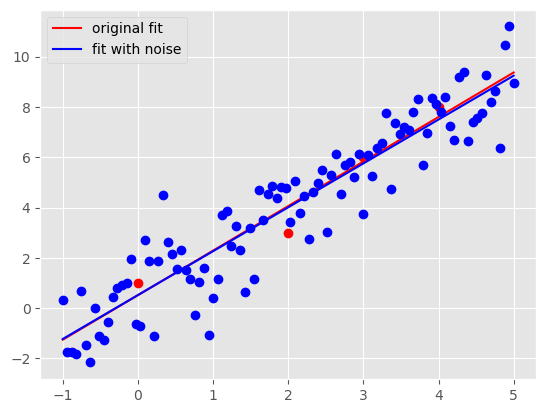

In [8]:

# generate plot
# plot original data points and line
plt.plot(X, y, 'ro')
orig_plot, = plt.plot(X_space, y_space, 'r')

# plot the generated 100 points with white gaussian noise and the new line
plt.plot(X_space, y_space_rand, 'bo')
rand_plot, = plt.plot(X_space, y_pred_rand, 'b')

# set up legend and save the plot to the current folder
plt.legend((orig_plot, rand_plot), \
    ('original fit', 'fit with noise'), loc = 'best')

plt.show()